## Appendix 1 - Python Code and Outputs

### Data Preparation

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Training Data

In [2]:
import numpy as np
import pandas as pd
# load training data
digit_training_data = pd.read_csv('train.csv')

# show first rows of the data
digit_training_data.head(100)
# show number of columns and rows
digit_training_data.shape

(42000, 785)

In [3]:
digit_training_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Investigation of Missing Data and Outliers in Training Data

In [3]:
# find null counts, percentage of null values, and column type
null_count = digit_training_data.isnull().sum()
null_percentage = digit_training_data.isnull().sum() * 100 / len(digit_training_data)
column_type = digit_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


The above analysis displays that there is no missing data in the digit recognizer training dataset.

### Import Testing Data

In [4]:
# import test dataset
digit_testing_data = pd.read_csv('test.csv')

# show first ten rows of the data
digit_testing_data.head(10)
# show number of columns and rows
digit_testing_data.shape

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(28000, 784)

### Investigation of Missing Data and Outliers in Training Data

In [5]:
# find null counts, percentage of null values, and column type
null_count = digit_testing_data.isnull().sum()
null_percentage = digit_testing_data.isnull().sum() * 100 / len(digit_training_data)
column_type = digit_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


The above analysis displays that there is no missing data in the digit recognizer test dataset.

### 3 x 2 Experimental Design

We used MLP Classifier and GridSearch cross-validation (5-folds) to find the optimal number of layers (2, 3, or 5) and nodes (10 or 20). We used the default activation function (relu), the default optimization solver, the adam solver and the default learning rate 0.001 (as recommended by sklearn's documentation).

C:\Users\cmark\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cmark\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cmark\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cmark\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cmark\anaconda3\lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [(10, 10), (20, 20),
                                                (10, 10, 10), (20, 20, 20),
                                                (10, 10, 10, 10, 10),
                                                (20, 20, 20, 20, 20)]},
             scoring='accuracy')

Best Hyperparameters: {'hidden_layer_sizes': (20, 20, 20, 20, 20)}
Training Accuracy: 0.990904761904762
Training Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       0.99      1.00      1.00      4684
           2       0.99      0.99      0.99      4177
           3       1.00      0.97      0.98      4351
           4       0.98      1.00      0.99      4072
           5       0.98      1.00      0.99      3795
           6       1.00      1.00      1.00      4137
           7       0.99      1.00      0.99      4401
           8       0.98      0.99      0.99      4063
           9       0.99      0.98      0.99      4188

    accuracy                           0.99     42000
   macro avg       0.99      0.99      0.99     42000
weighted avg       0.99      0.99      0.99     42000



,Layers,Nodes,Mean Training Accuracy
0,2,10,0.912214
1,2,20,0.939976
2,3,10,0.910690
3,3,20,0.938667
4,5,10,0.907024
5,5,20,0.943143


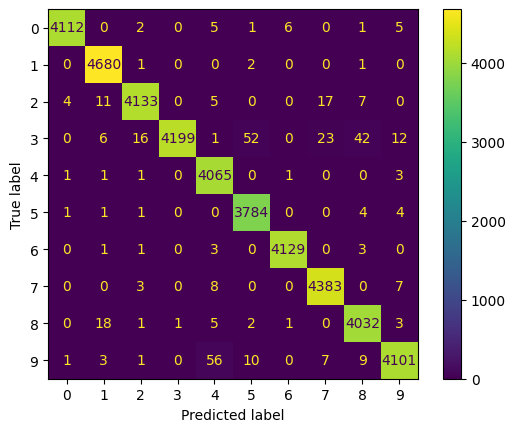

In [7]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Extract predictors and outcome (label variable)
X_train = digit_training_data.copy(deep=True)
X_train.drop(['label'], axis=1, inplace=True)
y_train = digit_training_data['label']


# Standardize the features
xscaler = StandardScaler()
X_train = xscaler.fit_transform(X_train)

# Initialize MLP Classifier
mlp_class = MLPClassifier(random_state=1)

# Create paramater grid with hyperparameters to tune, use default adam solver so doen't need to tune learning rate
param_grid = {
    'hidden_layer_sizes': [(10,10), (20,20), (10,10,10), (20,20,20), (10,10,10,10,10), (20,20,20,20,20)]
}

# Kfold cv with 5 splits for GridSearch
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Create the GridSearchCV with kfold=5 object and fit it to the training data
grid_search = GridSearchCV(mlp_class, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Save the best estimator
best_model = grid_search.best_estimator_

# Save dictionary of mean accuracy scores from models into 'scores' variable
dict_results = grid_search.cv_results_
scores = dict_results['mean_test_score']

# Use the best model to predict using training data
y_pred_train = best_model.predict(X_train)

# evaluate the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)
print("Training Classification Report:", classification_report(y_train, y_pred_train))

# Create the confusion matrix of the predictions
cm = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Save layer and node data
Layers = (2,2,3,3,5,5)
Nodes = (10,20,10,20,10,20)

# create dataframe with MLP details and scores for each mode and layer count tested
MLP_Scores = pd.DataFrame({'Layers' : Layers, 'Nodes' : Nodes, 'Mean Training Accuracy' : scores})
MLP_Scores

We see that a 5 layer and 20 node model yields the highest mean training accuracy score (0.943).

Apply MLPClassifier to Test Data

In [8]:
# Create a dataframe for predictor variables in the test dataframe for mlpclass model
mlpclass_testing_x = digit_testing_data.copy(deep=True)

# Standardize the features using same scaler as training data
mlpclass_testing_xscale = xscaler.transform(mlpclass_testing_x)

# Apply the mlpclass model to the test dataset
mlpclass_test_ypred = best_model.predict(mlpclass_testing_xscale)

# Put the kmeans predictions into a Pandas dataframe
prediction_df_mlpclass = pd.DataFrame(mlpclass_test_ypred, columns=['Label'])

# Add the ID column to the front of the mlpclass predictions dataframe
ImageId_series = pd.Series(range(1,28001))
prediction_df_mlpclass.insert(0, 'ImageId', ImageId_series)

# Output predictions to csv
#prediction_df_mlpclass.to_csv('test_predictions_mlpclass_v2.csv', index=False)


Let's display the Kaggle results from the application of the MLP Classifier model on the test dataset

<Figure size 1500x1500 with 0 Axes>

(-0.5, 984.5, 414.5, -0.5)

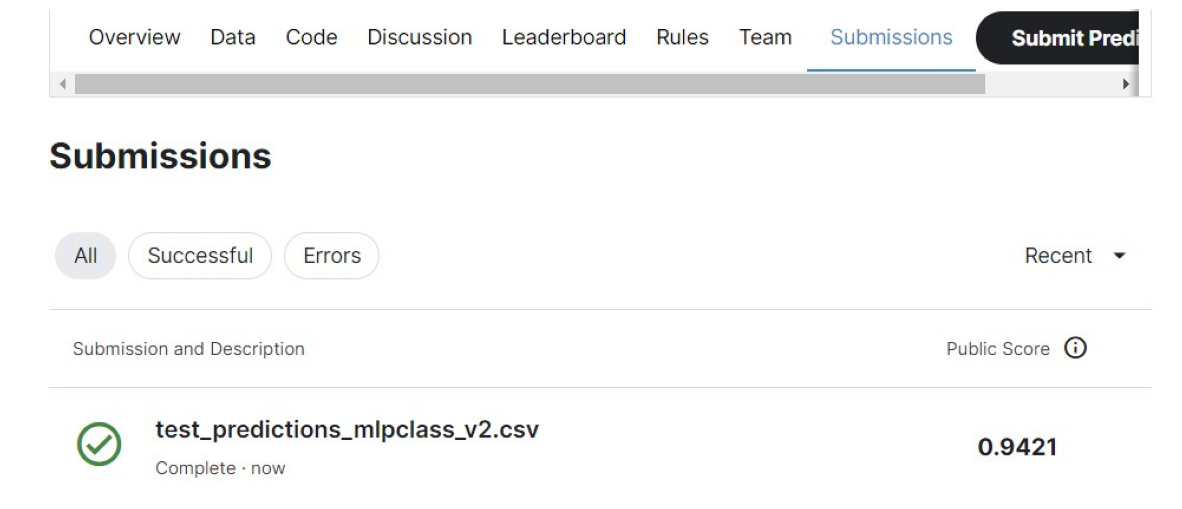

In [10]:
# Display the kaggle results associated with the MLP Classifier Model
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Digit_mlpclass_v2.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

### 2 x 2 Experimental Design for Learning Rate Tuning

First, let's load the required packages.

In [6]:
#pip install tensorflow
import tensorflow as tf
from tensorflow import keras

Next let's split the training data into training and validation sets

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the training dataframe
nn_train_df = digit_training_data.copy(deep=True)

sc = MinMaxScaler() #Initialize scaling of data

nn_train_df.drop(['label'], axis=1, inplace=True) #drop the label column from the df

nn_train_x = nn_train_df #set df without label as x
nn_train_y = digit_training_data['label'] #set y a the label column

sc.fit(nn_train_x)
normalized = sc.transform(nn_train_x)

# Convert scaled data from numpy array into dataframe
nn_training_features = list(nn_train_df.columns.values)
nn_training_scaled_df = pd.DataFrame(normalized, columns=nn_training_features)

# Split the Kaggle training data into training and validation components
nn_x_train, nn_x_validation, nn_y_train, nn_y_validation = train_test_split(nn_training_scaled_df,
                                                                      nn_train_y, 
                                                                            test_size=0.25, 
                                                                           random_state = 1)

MinMaxScaler()

In [8]:
nn_x_train.shape

nn_x_validation.shape

nn_y_train.shape

nn_y_validation.shape

(31500, 784)

(10500, 784)

(31500,)

(10500,)

In [9]:
nn_training_scaled_df.describe()
nn_training_scaled_df.shape
nn_training_scaled_df.head(20)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000863,0.000461,0.000233,0.000080,0.000068,0.000046,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024854,0.018243,0.012943,0.006956,0.007459,0.006682,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


(42000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Repeat Scaling for test data:

In [10]:
# Create a copy of the training dataframe
nn_test_df = digit_testing_data.copy(deep=True)

sc = MinMaxScaler() #Initialize scaling of data

nn_test_x = nn_test_df #set df without label as x

sc.fit(nn_test_x)
normalized = sc.transform(nn_test_x)

# Convert scaled data from numpy array into dataframe
nn_test_features = list(nn_test_df.columns.values)
nn_test_scaled_df = pd.DataFrame(normalized, columns=nn_test_features)

MinMaxScaler()

In [11]:
nn_test_scaled_df.describe()
nn_test_scaled_df.shape
nn_test_scaled_df.head(20)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000651,0.000288,0.000145,0.000060,0.000055,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021634,0.014239,0.009397,0.006445,0.006786,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0


(28000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create a model using Sequential API utilizing hyperbolic tangent activation method

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784,]),
    keras.layers.Dense(20, activation="tanh"),
    keras.layers.Dense(20, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

#### Examine the weights and biases of Hidden Layer 1

In [15]:
weights, biases = model.layers[1].get_weights()

weights

weights.shape

biases

biases.shape

array([[ 0.07326624,  0.04950942, -0.0630369 , ...,  0.02167481,
        -0.00245464,  0.07073659],
       [-0.08012948, -0.05141045,  0.08416586, ...,  0.02029417,
        -0.06791637,  0.05525993],
       [ 0.01694722,  0.04899427,  0.07274768, ..., -0.04581188,
         0.05995984,  0.00395826],
       ...,
       [-0.03618319,  0.00040896, -0.06808969, ...,  0.00653894,
         0.08358839, -0.04321414],
       [ 0.06863168,  0.03469124,  0.00118482, ...,  0.02018707,
        -0.06759581, -0.06775653],
       [ 0.03377858, -0.06785498, -0.07941253, ..., -0.07023329,
        -0.0207302 ,  0.07253633]], dtype=float32)

(784, 20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

(20,)

#### Examine the weights and biases of Hidden Layer 2

In [16]:
weights, biases = model.layers[2].get_weights()

weights

weights.shape

biases

biases.shape

array([[-0.10111153,  0.09760392, -0.33700863, -0.01380053,  0.12705648,
         0.11644924,  0.185121  , -0.27162716, -0.11037886, -0.10487276,
         0.05030358, -0.15251108,  0.1423583 ,  0.27406353,  0.3503375 ,
        -0.04738346, -0.21044031,  0.15255487, -0.38132113, -0.17750156],
       [ 0.27691275, -0.03286865, -0.25426352,  0.33897436,  0.05676907,
        -0.15932441,  0.1299097 , -0.1729231 ,  0.3532918 ,  0.07407343,
        -0.0419105 , -0.3826936 , -0.0787648 ,  0.12646747,  0.14670545,
        -0.09610766, -0.3743185 ,  0.33871996,  0.33835232,  0.15350795],
       [-0.03372225, -0.16610663, -0.09282297,  0.1484366 , -0.03761545,
         0.31965107,  0.02658424,  0.16245556,  0.11692977,  0.04515153,
         0.19763869, -0.34725642,  0.2885599 ,  0.30835772,  0.33098644,
        -0.1257908 , -0.20100398,  0.31614578, -0.0337902 ,  0.06840962],
       [-0.21065176,  0.11045173, -0.3308252 , -0.06850389,  0.32132518,
        -0.08534351,  0.2601953 ,  0.2395891 ,  

(20, 20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

(20,)

#### Examine the weights and biases of Layer 3

In [17]:
weights, biases = model.layers[3].get_weights()

weights

weights.shape

biases

biases.shape

array([[ 0.04408306,  0.36542046,  0.26690948, -0.24347757,  0.1313414 ,
        -0.11363956,  0.2218203 , -0.3421546 ,  0.22415304, -0.19604874],
       [-0.2608027 , -0.25291914,  0.14113396, -0.20771736, -0.43182316,
        -0.34950632, -0.08048141, -0.35588285, -0.13631114,  0.15477705],
       [ 0.15132159, -0.279961  ,  0.15711945, -0.05491522, -0.09607232,
         0.4219101 ,  0.13201994,  0.259125  ,  0.3111174 , -0.14609912],
       [-0.35370272, -0.02998248, -0.4066808 , -0.3775913 ,  0.26864576,
         0.07168204,  0.42556882,  0.22688591,  0.17318076, -0.1925419 ],
       [-0.43113425,  0.10641855, -0.32746786,  0.21406245, -0.13901949,
        -0.09051248,  0.11447072,  0.17184532, -0.3263547 , -0.00372022],
       [ 0.33084285,  0.02857012, -0.06847629, -0.05130854, -0.43838   ,
        -0.06801739,  0.24508888, -0.11380729, -0.38612655, -0.08503214],
       [-0.20522684, -0.25851178, -0.14190081, -0.23618096,  0.20544672,
         0.37163848, -0.04718006, -0.24027874

(20, 10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

(10,)

### Compile the Sequential API model and specify the loss function and optimizer:

- Loss function: <b>sparse categorical cross-entropy</b>
- Optimization method: <b>RMS prop, learning rate set to 0.01</b>
- Evaluation metric: <b>accuracy</b>

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
              metrics=["accuracy"])

#### Now the model is ready to be trained

In [19]:
history = model.fit(nn_x_train, nn_y_train, epochs=30,
                   validation_data=(nn_x_validation, nn_y_validation))

Epoch 1/30
985/985 [==============================] - 2s 2ms/step - loss: 0.3878 - accuracy: 0.8847 - val_loss: 0.3442 - val_accuracy: 0.8929
Epoch 2/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2638 - accuracy: 0.9217 - val_loss: 0.2338 - val_accuracy: 0.9319
Epoch 3/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2341 - accuracy: 0.9319 - val_loss: 0.2545 - val_accuracy: 0.9271
Epoch 4/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2150 - accuracy: 0.9373 - val_loss: 0.2204 - val_accuracy: 0.9360
Epoch 5/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2053 - accuracy: 0.9386 - val_loss: 0.2381 - val_accuracy: 0.9285
Epoch 6/30
985/985 [==============================] - 2s 2ms/step - loss: 0.1856 - accuracy: 0.9448 - val_loss: 0.2402 - val_accuracy: 0.9332
Epoch 7/30
985/985 [==============================] - 2s 2ms/step - loss: 0.1805 - accuracy: 0.9477 - val_loss: 0.2231 - val_accuracy: 0.9371
Epoch 

<AxesSubplot:>

(0.0, 1.0)

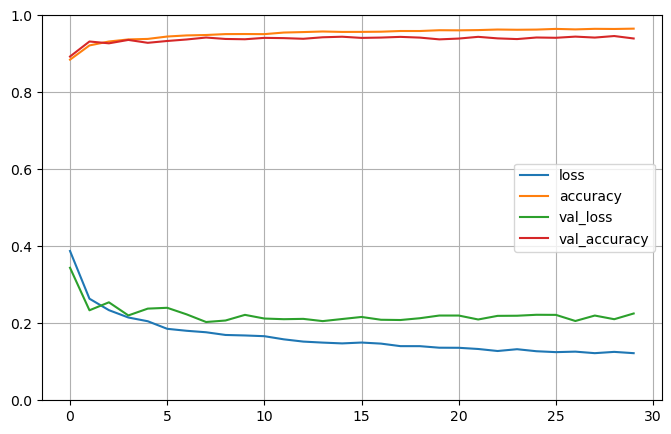

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

#### We can then use the model to predict

The array below produces one probability per class (digit)

In [21]:
ypred = model.predict(nn_test_scaled_df)

y_proba = ypred.round(2)

y_proba

875/875 [==============================] - 1s 990us/step


array([[0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.05, 0.21, 0.39],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ]], dtype=float32)

Below are two ways to show the class with the highest estimated probability:

In [22]:
classes_x=np.argmax(ypred,axis=1)
classes_x

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [23]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
np.array(class_names)[classes_x]

array(['2', '0', '9', ..., '3', '9', '2'], dtype='<U1')

#### Accuracy and loss values for training data

In [24]:
loss, accuracy = model.evaluate(nn_x_train, nn_y_train)
print("Accuracy:", accuracy)
print("Loss:", loss)

985/985 [==============================] - 1s 1ms/step - loss: 0.1198 - accuracy: 0.9654
Accuracy: 0.9653650522232056
Loss: 0.11980774998664856


#### Accuracy and loss values for validation data

In [25]:
loss, accuracy = model.evaluate(nn_x_validation, nn_y_validation)
print("Accuracy:", accuracy)
print("Loss:", loss)

329/329 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9397
Accuracy: 0.9397143125534058
Loss: 0.2254227101802826


### Compile the Sequential API model and specify the loss function and optimizer:

- Loss function: <b>sparse categorical cross-entropy</b>
- Optimization method: <b>Adagrad, learning rate set to 0.1</b>
- Evaluation metric: <b>accuracy</b>

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adagrad(learning_rate=0.1),
              metrics=["accuracy"])

#### Now the model is ready to be trained

In [28]:
history = model.fit(nn_x_train, nn_y_train, epochs=30,
                   validation_data=(nn_x_validation, nn_y_validation))

Epoch 1/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0915 - accuracy: 0.9742 - val_loss: 0.2013 - val_accuracy: 0.9449
Epoch 2/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0755 - accuracy: 0.9784 - val_loss: 0.1951 - val_accuracy: 0.9470
Epoch 3/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0682 - accuracy: 0.9807 - val_loss: 0.2012 - val_accuracy: 0.9474
Epoch 4/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0633 - accuracy: 0.9819 - val_loss: 0.2025 - val_accuracy: 0.9474
Epoch 5/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0597 - accuracy: 0.9837 - val_loss: 0.2056 - val_accuracy: 0.9458
Epoch 6/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0570 - accuracy: 0.9845 - val_loss: 0.2073 - val_accuracy: 0.9461
Epoch 7/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0548 - accuracy: 0.9849 - val_loss: 0.2102 - val_accuracy: 0.9448
Epoch 

<AxesSubplot:>

(0.0, 1.0)

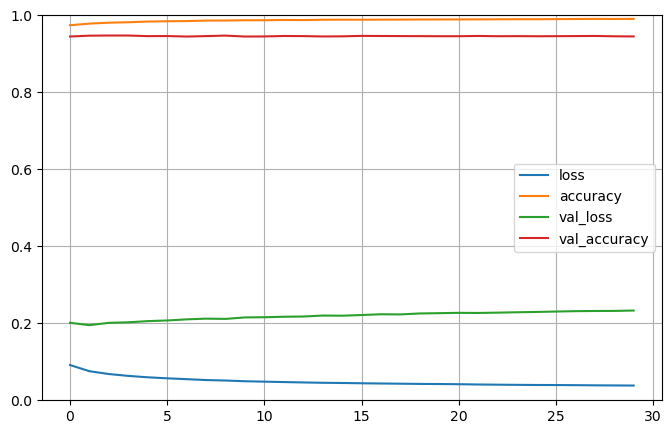

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

#### We can then use the model to predict

The array below produces one probability per class (digit)

In [30]:
ypred = model.predict(nn_test_scaled_df)

y_proba = ypred.round(2)

y_proba

875/875 [==============================] - 1s 1ms/step


array([[0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.99, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.89],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

Below are two ways to show the class with the highest estimated probability:

In [31]:
classes_x=np.argmax(ypred,axis=1)
classes_x

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [32]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
np.array(class_names)[classes_x]

array(['2', '0', '9', ..., '3', '9', '2'], dtype='<U1')

#### Accuracy and loss values for training data

In [33]:
loss, accuracy = model.evaluate(nn_x_train, nn_y_train)
print("Accuracy:", accuracy)
print("Loss:", loss)

985/985 [==============================] - 1s 1ms/step - loss: 0.0370 - accuracy: 0.9908
Accuracy: 0.9908254146575928
Loss: 0.03702748194336891


#### Accuracy and loss values for validation data

In [34]:
loss, accuracy = model.evaluate(nn_x_validation, nn_y_validation)
print("Accuracy:", accuracy)
print("Loss:", loss)

329/329 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9450
Accuracy: 0.9450476169586182
Loss: 0.23309732973575592


## Create a Sequential API model utilizing RELU activation method

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[784,]),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 20)                15700     
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.layers

#### Examine the weights and biases of Hidden Layer 1

In [39]:
weights, biases = model.layers[1].get_weights()

weights

weights.shape

biases

biases.shape

array([[-0.03979247,  0.04281363,  0.05254355, ..., -0.03678064,
         0.04354841, -0.07401411],
       [-0.03818677, -0.01641221, -0.0067735 , ...,  0.03408412,
        -0.06768759, -0.06182778],
       [ 0.01679847, -0.0574919 , -0.04084401, ..., -0.07583979,
        -0.00075091, -0.06602461],
       ...,
       [ 0.02339515, -0.01881402,  0.06827503, ..., -0.04605354,
         0.02058062,  0.08486018],
       [ 0.03087426,  0.02670233, -0.02150353, ...,  0.04234841,
         0.06985018,  0.03585381],
       [ 0.01518469,  0.07592402,  0.03056587, ..., -0.05865112,
         0.0355487 , -0.0219681 ]], dtype=float32)

(784, 20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

(20,)

#### Examine the weights and biases of Hidden Layer 2

In [40]:
weights, biases = model.layers[2].get_weights()

weights

weights.shape

biases

biases.shape

array([[ 0.00764143, -0.34899175, -0.3054614 , -0.14467518, -0.10968152,
         0.19741613,  0.36031878,  0.23396176,  0.2269885 ,  0.15340674,
         0.07932097,  0.15411556,  0.3755085 , -0.26812539, -0.09384489,
         0.03225303,  0.32333255,  0.08503556, -0.11971831, -0.08072177],
       [-0.15443736, -0.019137  ,  0.1889407 ,  0.24003631, -0.2219754 ,
        -0.07670453,  0.01307401, -0.11175692,  0.1704126 ,  0.01831067,
        -0.17758088, -0.12256902, -0.12644634,  0.10247388, -0.16840522,
        -0.17573187,  0.09597895,  0.17649102,  0.32489216, -0.19727486],
       [ 0.22062975, -0.19756787, -0.19619228,  0.29492617, -0.12241232,
        -0.3304566 ,  0.18560153, -0.38271657,  0.18384588,  0.21007574,
        -0.01481998,  0.14551252, -0.03626481,  0.30620694, -0.10323033,
         0.36442107, -0.3561025 ,  0.33644563,  0.18293315,  0.27569914],
       [ 0.2783491 ,  0.32727146,  0.19030058, -0.01746833, -0.37611747,
         0.14141828,  0.30225688,  0.05925244,  

(20, 20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

(20,)

#### Examine the weights and biases of Layer 3

In [41]:
weights, biases = model.layers[3].get_weights()

weights

weights.shape

biases

biases.shape

array([[-1.10205948e-01,  3.38503242e-01,  1.52845144e-01,
         3.10721695e-01,  1.88794076e-01,  1.62791193e-01,
        -1.17220432e-01,  8.14648867e-02,  4.07818973e-01,
        -2.86190510e-01],
       [ 5.85073829e-02,  3.77504528e-01, -2.98117042e-01,
         2.88956463e-01,  4.07948554e-01, -8.56868029e-02,
         1.40638292e-01,  7.75764585e-02,  2.05348790e-01,
        -2.90280193e-01],
       [ 3.27653587e-01,  3.60073745e-01, -1.22879297e-01,
        -1.42733842e-01, -4.31077868e-01, -3.33747506e-01,
        -3.53607059e-01,  7.37733841e-02, -4.26989794e-02,
         1.49662197e-01],
       [ 2.60838211e-01,  1.13839626e-01,  1.68418646e-01,
        -4.11001295e-01, -1.51070148e-01, -1.37736917e-01,
        -3.06604624e-01, -1.61015093e-02,  3.71852040e-01,
         5.64956069e-02],
       [ 1.92616522e-01,  4.35427487e-01,  2.01382697e-01,
         7.24178553e-03, -2.70731747e-01,  1.02239311e-01,
         4.33010221e-01, -1.40573531e-01, -4.23397094e-01,
        -3.

(20, 10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

(10,)

### Compile the Sequential API model and specify the loss function and optimizer:

- Loss function: <b>sparse categorical cross-entropy</b>
- Optimization method: <b>RMS prop, learning rate set to 0.001</b>
- Evaluation metric: <b>accuracy</b>

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

#### Now the model is ready to be trained

In [43]:
history = model.fit(nn_x_train, nn_y_train, epochs=30,
                   validation_data=(nn_x_validation, nn_y_validation))

Epoch 1/30
985/985 [==============================] - 2s 2ms/step - loss: 0.5625 - accuracy: 0.8340 - val_loss: 0.3042 - val_accuracy: 0.9088
Epoch 2/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2726 - accuracy: 0.9227 - val_loss: 0.2401 - val_accuracy: 0.9319
Epoch 3/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2285 - accuracy: 0.9349 - val_loss: 0.2261 - val_accuracy: 0.9359
Epoch 4/30
985/985 [==============================] - 2s 2ms/step - loss: 0.2021 - accuracy: 0.9417 - val_loss: 0.2092 - val_accuracy: 0.9376
Epoch 5/30
985/985 [==============================] - 2s 2ms/step - loss: 0.1821 - accuracy: 0.9480 - val_loss: 0.1969 - val_accuracy: 0.9436
Epoch 6/30
985/985 [==============================] - 2s 2ms/step - loss: 0.1676 - accuracy: 0.9525 - val_loss: 0.1794 - val_accuracy: 0.9465
Epoch 7/30
985/985 [==============================] - 2s 2ms/step - loss: 0.1553 - accuracy: 0.9553 - val_loss: 0.1747 - val_accuracy: 0.9497
Epoch 

<AxesSubplot:>

(0.0, 1.0)

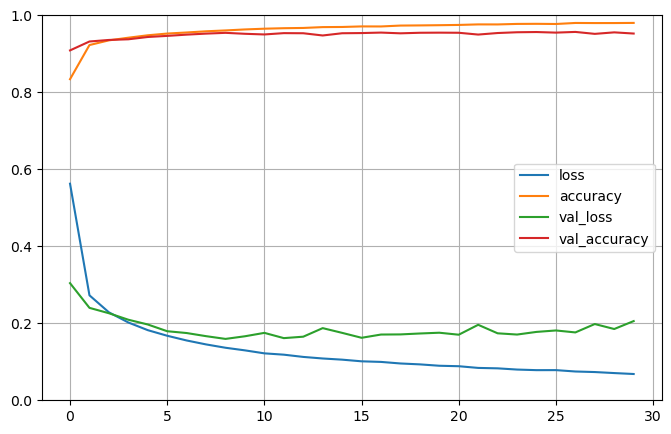

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

#### We can then use the model to predict

The array below produces one probability per class (digit)

In [45]:
ypred = model.predict(nn_test_scaled_df)

y_proba = ypred.round(2)

y_proba

875/875 [==============================] - 1s 938us/step


array([[0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.91],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

Below are two ways to show the class with the highest estimated probability:

In [46]:
classes_x=np.argmax(ypred,axis=1)
classes_x

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [47]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
np.array(class_names)[classes_x]

array(['2', '0', '9', ..., '3', '9', '2'], dtype='<U1')

#### Accuracy and loss values for training data

In [48]:
loss, accuracy = model.evaluate(nn_x_train, nn_y_train)
print("Accuracy:", accuracy)
print("Loss:", loss)

985/985 [==============================] - 1s 1ms/step - loss: 0.0689 - accuracy: 0.9801
Accuracy: 0.9800634980201721
Loss: 0.06894040107727051


#### Accuracy and loss values for validation data

In [49]:
loss, accuracy = model.evaluate(nn_x_validation, nn_y_validation)
print("Accuracy:", accuracy)
print("Loss:", loss)

329/329 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9526
Accuracy: 0.952571451663971
Loss: 0.2056991308927536


### Compile the Sequential API model and specify the loss function and optimizer:

- Loss function: <b>sparse categorical cross-entropy</b>
- Optimization method: <b>AdaGrad, learning rate set to 0.005</b>
- Evaluation metric: <b>accuracy</b>

In [51]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adagrad(learning_rate=0.005),
              metrics=["accuracy"])

#### Now the model is ready to be trained

In [52]:
history = model.fit(nn_x_train, nn_y_train, epochs=30,
                   validation_data=(nn_x_validation, nn_y_validation))

Epoch 1/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0522 - accuracy: 0.9862 - val_loss: 0.1754 - val_accuracy: 0.9572
Epoch 2/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0472 - accuracy: 0.9879 - val_loss: 0.1786 - val_accuracy: 0.9570
Epoch 3/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0456 - accuracy: 0.9886 - val_loss: 0.1757 - val_accuracy: 0.9566
Epoch 4/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0446 - accuracy: 0.9890 - val_loss: 0.1770 - val_accuracy: 0.9558
Epoch 5/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0436 - accuracy: 0.9893 - val_loss: 0.1758 - val_accuracy: 0.9568
Epoch 6/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0431 - accuracy: 0.9897 - val_loss: 0.1766 - val_accuracy: 0.9567
Epoch 7/30
985/985 [==============================] - 2s 2ms/step - loss: 0.0424 - accuracy: 0.9896 - val_loss: 0.1780 - val_accuracy: 0.9565
Epoch 

<AxesSubplot:>

(0.0, 1.0)

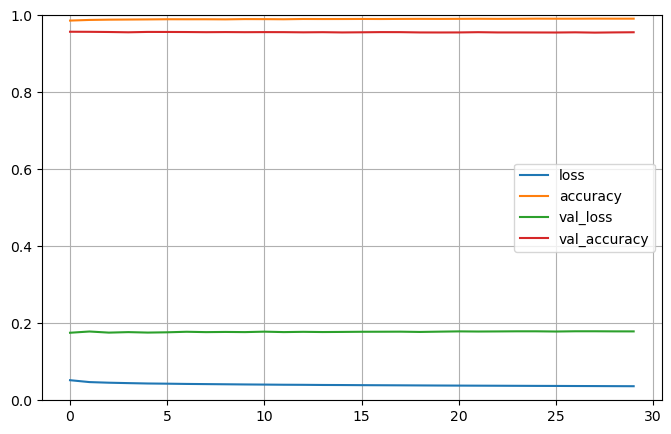

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

#### We can then use the model to predict

The array below produces one probability per class (digit)

In [54]:
ypred = model.predict(nn_test_scaled_df)

y_proba = ypred.round(2)

y_proba

875/875 [==============================] - 1s 984us/step


array([[0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.04, 0.  , 0.93],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

Below are two ways to show the class with the highest estimated probability:

In [55]:
classes_x=np.argmax(ypred,axis=1)
classes_x

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [56]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
np.array(class_names)[classes_x]

array(['2', '0', '9', ..., '3', '9', '2'], dtype='<U1')

#### Accuracy and loss values for training data

In [57]:
loss, accuracy = model.evaluate(nn_x_train, nn_y_train)
print("Accuracy:", accuracy)
print("Loss:", loss)

985/985 [==============================] - 1s 1ms/step - loss: 0.0358 - accuracy: 0.9916
Accuracy: 0.9915555715560913
Loss: 0.03575896471738815


#### Accuracy and loss values for validation data

In [58]:
loss, accuracy = model.evaluate(nn_x_validation, nn_y_validation)
print("Accuracy:", accuracy)
print("Loss:", loss)

329/329 [==============================] - 0s 1ms/step - loss: 0.1789 - accuracy: 0.9559
Accuracy: 0.9559047818183899
Loss: 0.17890749871730804


### 2 x 2 Experiment to Tune Learning Rates with MLPClassifier

In this section, we will conduct a 2x2 experiment that compares the accuracy of neural nets with constant and adaptive learning rates and with initial learning rates of 0.001 and 0.01.

#### Build a Neural Net with Constant Learning Rate and Initial Learning Rate of 0.01

Build the initial model using the testing data

The total run time for the Principal Components Analysis was 0:03:16.223515.
Best Hyperparameters: {'learning_rate': 'constant', 'learning_rate_init': 0.01}
Training Accuracy: 0.9919523809523809
Training Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4132
           1       1.00      1.00      1.00      4684
           2       0.99      0.99      0.99      4177
           3       0.98      1.00      0.99      4351
           4       0.98      1.00      0.99      4072
           5       1.00      0.97      0.98      3795
           6       1.00      0.99      1.00      4137
           7       0.99      1.00      1.00      4401
           8       1.00      0.99      0.99      4063
           9       0.99      0.99      0.99      4188

    accuracy                           0.99     42000
   macro avg       0.99      0.99      0.99     42000
weighted avg       0.99      0.99      0.99     42000



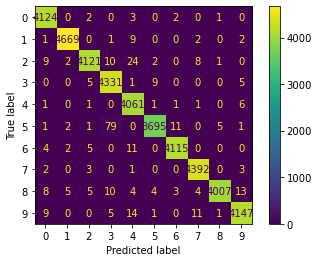

In [6]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import datetime


# Extract predictors and outcome (label variable)
X_train_SD = digit_training_data.copy(deep=True)
X_train_SD.drop(['label'], axis=1, inplace=True)
y_train_SD = digit_training_data['label']


# Standardize the features
xscaler = StandardScaler()
X_train_SD = xscaler.fit_transform(X_train_SD)

# Initialize MLP Classifier
mlp_class = MLPClassifier(random_state=1, hidden_layer_sizes =(20, 20, 20, 20, 20), solver = 'sgd')

# Create paramater grid with hyperparameters to tune, use default adam solver so doen't need to tune learning rate
param_grid = {
    'learning_rate': ['constant'],
    'learning_rate_init': [0.01]
}

# Kfold cv with 5 splits for GridSearch
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Create the GridSearchCV with kfold=5 object and fit it to the training data
nn_start = datetime.datetime.now()
grid_search = GridSearchCV(mlp_class, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_SD, y_train_SD)

# Print the time to fit the neural net model
nn_end = datetime.datetime.now()
nn_runtime = nn_end - nn_start
print(f"The total run time for the Principal Components Analysis was {nn_runtime}.")

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Save the best estimator
best_model = grid_search.best_estimator_

# Save dictionary of mean accuracy scores from models into 'scores' variable
#dict_results = grid_search.cv_results_
#scores = dict_results['mean_test_score']

# Use the best model to predict using training data
y_pred_train_SD = best_model.predict(X_train_SD)

# evaluate the model on the training data
accuracy_train_SD = accuracy_score(y_train_SD, y_pred_train_SD)
print("Training Accuracy:", accuracy_train_SD)
print("Training Classification Report:", classification_report(y_train_SD, y_pred_train_SD))

# Create the confusion matrix of the predictions
cm = confusion_matrix(y_train_SD, y_pred_train_SD)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


Apply MLP Classifier to test data

In [7]:
# Create a dataframe for predictor variables in the test dataframe for mlpclass model
mlpclass_testing_x_SD = digit_testing_data.copy(deep=True)

# Standardize the features using same scaler as training data
mlpclass_testing_xscale_SD = xscaler.transform(mlpclass_testing_x_SD)

# Apply the mlpclass model to the test dataset
mlpclass_test_ypred_SD = best_model.predict(mlpclass_testing_xscale_SD)

# Put the kmeans predictions into a Pandas dataframe
prediction_df_mlpclass_SD = pd.DataFrame(mlpclass_test_ypred_SD, columns=['Label'])

# Add the ID column to the front of the mlpclass predictions dataframe
ImageId_series = pd.Series(range(1,28001))
prediction_df_mlpclass_SD.insert(0, 'ImageId', ImageId_series)

# Output predictions to csv
prediction_df_mlpclass_SD.to_csv('test_predictions_mlpclass_constant_01.csv', index=False)


Let's display the Kaggle results from the application of the MLP Classifier model on the test dataset

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1481.5, 314.5, -0.5)

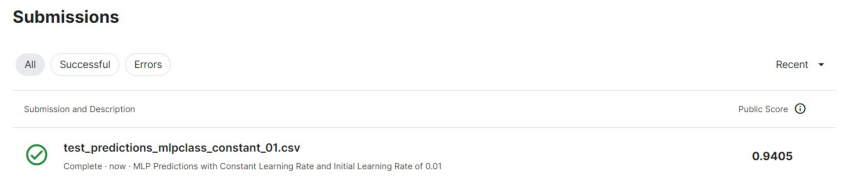

In [8]:
# Display the kaggle results associated with the MLP Classifier Model
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Kaggle_results_mlpclass_constant_01.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

#### Build a Neural Net with Constant Learning Rate and Initial Learning Rate of 0.001

Build the initial model using the testing data

C:\Users\steve\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\sklearn\neural_network\_multi

The total run time for the Principal Components Analysis was 0:08:33.066414.
Best Hyperparameters: {'learning_rate': 'constant', 'learning_rate_init': 0.001}
Training Accuracy: 0.997547619047619
Training Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       1.00      1.00      1.00      4401
           8       1.00      1.00      1.00      4063
           9       1.00      1.00      1.00      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000



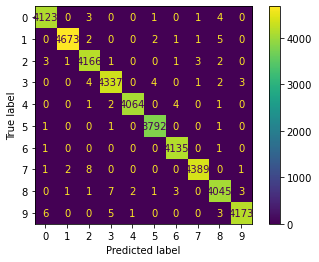

In [9]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import datetime


# Extract predictors and outcome (label variable)
X_train_SD = digit_training_data.copy(deep=True)
X_train_SD.drop(['label'], axis=1, inplace=True)
y_train_SD = digit_training_data['label']


# Standardize the features
xscaler = StandardScaler()
X_train_SD = xscaler.fit_transform(X_train_SD)

# Initialize MLP Classifier
mlp_class = MLPClassifier(random_state=1, hidden_layer_sizes =(20, 20, 20, 20, 20), solver = 'sgd')

# Create paramater grid with hyperparameters to tune, use default adam solver so doen't need to tune learning rate
param_grid = {
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001]
}

# Kfold cv with 5 splits for GridSearch
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Create the GridSearchCV with kfold=5 object and fit it to the training data
nn_start = datetime.datetime.now()
grid_search = GridSearchCV(mlp_class, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_SD, y_train_SD)

# Print the time to fit the neural net model
nn_end = datetime.datetime.now()
nn_runtime = nn_end - nn_start
print(f"The total run time for the Principal Components Analysis was {nn_runtime}.")

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Save the best estimator
best_model = grid_search.best_estimator_

# Save dictionary of mean accuracy scores from models into 'scores' variable
#dict_results = grid_search.cv_results_
#scores = dict_results['mean_test_score']

# Use the best model to predict using training data
y_pred_train_SD = best_model.predict(X_train_SD)

# evaluate the model on the training data
accuracy_train_SD = accuracy_score(y_train_SD, y_pred_train_SD)
print("Training Accuracy:", accuracy_train_SD)
print("Training Classification Report:", classification_report(y_train_SD, y_pred_train_SD))

# Create the confusion matrix of the predictions
cm = confusion_matrix(y_train_SD, y_pred_train_SD)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


Apply MLP Classifier to test data

In [10]:
# Create a dataframe for predictor variables in the test dataframe for mlpclass model
mlpclass_testing_x_SD = digit_testing_data.copy(deep=True)

# Standardize the features using same scaler as training data
mlpclass_testing_xscale_SD = xscaler.transform(mlpclass_testing_x_SD)

# Apply the mlpclass model to the test dataset
mlpclass_test_ypred_SD = best_model.predict(mlpclass_testing_xscale_SD)

# Put the kmeans predictions into a Pandas dataframe
prediction_df_mlpclass_SD = pd.DataFrame(mlpclass_test_ypred_SD, columns=['Label'])

# Add the ID column to the front of the mlpclass predictions dataframe
ImageId_series = pd.Series(range(1,28001))
prediction_df_mlpclass_SD.insert(0, 'ImageId', ImageId_series)

# Output predictions to csv
prediction_df_mlpclass_SD.to_csv('test_predictions_mlpclass_constant_001.csv', index=False)


Let's display the Kaggle results from the application of the MLP Classifier model on the test dataset

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1483.5, 317.5, -0.5)

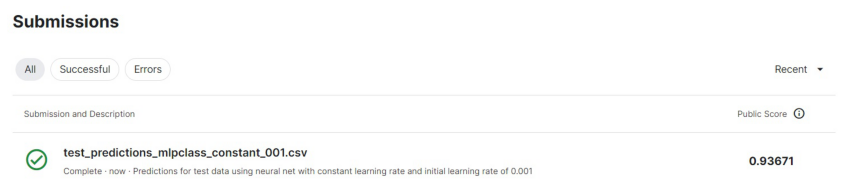

In [11]:
# Display the kaggle results associated with the MLP Classifier Model
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Kaggle_results_mlpclass_constant_001.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

#### Build a Neural Net with Adaptive Learning Rate and Initial Learning Rate of 0.01

Build the initial model using the testing data

The total run time for the model creation was 0:06:39.432408.
Best Hyperparameters: {'learning_rate': 'adaptive', 'learning_rate_init': 0.01}
Training Accuracy: 0.9995238095238095
Training Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       1.00      1.00      1.00      4401
           8       1.00      1.00      1.00      4063
           9       1.00      1.00      1.00      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000



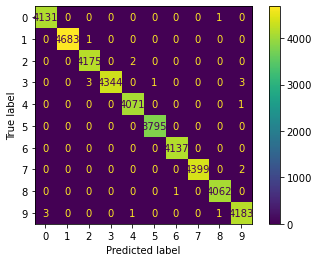

In [12]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import datetime


# Extract predictors and outcome (label variable)
X_train_SD = digit_training_data.copy(deep=True)
X_train_SD.drop(['label'], axis=1, inplace=True)
y_train_SD = digit_training_data['label']


# Standardize the features
xscaler = StandardScaler()
X_train_SD = xscaler.fit_transform(X_train_SD)

# Initialize MLP Classifier
mlp_class = MLPClassifier(random_state=1, hidden_layer_sizes =(20, 20, 20, 20, 20), solver = 'sgd')

# Create paramater grid with hyperparameters to tune, use default adam solver so doen't need to tune learning rate
param_grid = {
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.01]
}

# Kfold cv with 5 splits for GridSearch
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Create the GridSearchCV with kfold=5 object and fit it to the training data
nn_start = datetime.datetime.now()
grid_search = GridSearchCV(mlp_class, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_SD, y_train_SD)

# Print the time to fit the neural net model
nn_end = datetime.datetime.now()
nn_runtime = nn_end - nn_start
print(f"The total run time for the model creation was {nn_runtime}.")

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Save the best estimator
best_model = grid_search.best_estimator_

# Save dictionary of mean accuracy scores from models into 'scores' variable
#dict_results = grid_search.cv_results_
#scores = dict_results['mean_test_score']

# Use the best model to predict using training data
y_pred_train_SD = best_model.predict(X_train_SD)

# evaluate the model on the training data
accuracy_train_SD = accuracy_score(y_train_SD, y_pred_train_SD)
print("Training Accuracy:", accuracy_train_SD)
print("Training Classification Report:", classification_report(y_train_SD, y_pred_train_SD))

# Create the confusion matrix of the predictions
cm = confusion_matrix(y_train_SD, y_pred_train_SD)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


Apply MLP Classifier to test data

In [13]:
# Create a dataframe for predictor variables in the test dataframe for mlpclass model
mlpclass_testing_x_SD = digit_testing_data.copy(deep=True)

# Standardize the features using same scaler as training data
mlpclass_testing_xscale_SD = xscaler.transform(mlpclass_testing_x_SD)

# Apply the mlpclass model to the test dataset
mlpclass_test_ypred_SD = best_model.predict(mlpclass_testing_xscale_SD)

# Put the kmeans predictions into a Pandas dataframe
prediction_df_mlpclass_SD = pd.DataFrame(mlpclass_test_ypred_SD, columns=['Label'])

# Add the ID column to the front of the mlpclass predictions dataframe
ImageId_series = pd.Series(range(1,28001))
prediction_df_mlpclass_SD.insert(0, 'ImageId', ImageId_series)

# Output predictions to csv
prediction_df_mlpclass_SD.to_csv('test_predictions_mlpclass_adaptive_01.csv', index=False)


Let's display the Kaggle results from the application of the MLP Classifier model on the test dataset

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1501.5, 331.5, -0.5)

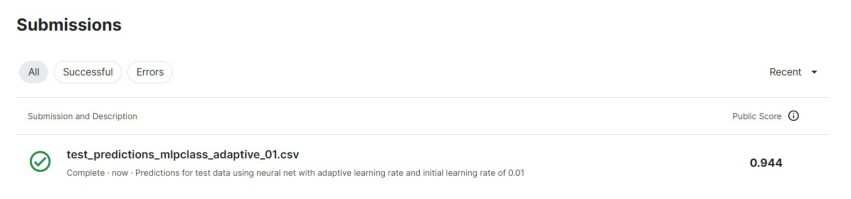

In [14]:
# Display the kaggle results associated with the MLP Classifier Model
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Kaggle_results_mlpclass_adaptive_01.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

#### Build a Neural Net with Adaptive Learning Rate and Initial Learning Rate of 0.001

Build the initial model using the testing data

C:\Users\steve\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\steve\anaconda3\lib\site-packages\sklearn\neural_network\_multi

The total run time for the model creation was 0:08:21.102617.
Best Hyperparameters: {'learning_rate': 'adaptive', 'learning_rate_init': 0.001}
Training Accuracy: 0.997547619047619
Training Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       1.00      1.00      1.00      4401
           8       1.00      1.00      1.00      4063
           9       1.00      1.00      1.00      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000



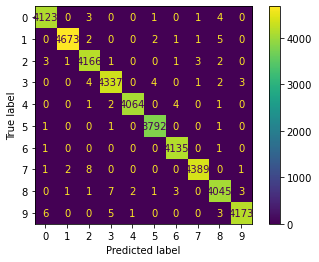

In [15]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import datetime


# Extract predictors and outcome (label variable)
X_train_SD = digit_training_data.copy(deep=True)
X_train_SD.drop(['label'], axis=1, inplace=True)
y_train_SD = digit_training_data['label']


# Standardize the features
xscaler = StandardScaler()
X_train_SD = xscaler.fit_transform(X_train_SD)

# Initialize MLP Classifier
mlp_class = MLPClassifier(random_state=1, hidden_layer_sizes =(20, 20, 20, 20, 20), solver = 'sgd')

# Create paramater grid with hyperparameters to tune, use default adam solver so doen't need to tune learning rate
param_grid = {
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.001]
}

# Kfold cv with 5 splits for GridSearch
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Create the GridSearchCV with kfold=5 object and fit it to the training data
nn_start = datetime.datetime.now()
grid_search = GridSearchCV(mlp_class, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_SD, y_train_SD)

# Print the time to fit the neural net model
nn_end = datetime.datetime.now()
nn_runtime = nn_end - nn_start
print(f"The total run time for the model creation was {nn_runtime}.")

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Save the best estimator
best_model = grid_search.best_estimator_

# Save dictionary of mean accuracy scores from models into 'scores' variable
#dict_results = grid_search.cv_results_
#scores = dict_results['mean_test_score']

# Use the best model to predict using training data
y_pred_train_SD = best_model.predict(X_train_SD)

# evaluate the model on the training data
accuracy_train_SD = accuracy_score(y_train_SD, y_pred_train_SD)
print("Training Accuracy:", accuracy_train_SD)
print("Training Classification Report:", classification_report(y_train_SD, y_pred_train_SD))

# Create the confusion matrix of the predictions
cm = confusion_matrix(y_train_SD, y_pred_train_SD)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Apply MLP Classifier to test data

In [16]:
# Create a dataframe for predictor variables in the test dataframe for mlpclass model
mlpclass_testing_x_SD = digit_testing_data.copy(deep=True)

# Standardize the features using same scaler as training data
mlpclass_testing_xscale_SD = xscaler.transform(mlpclass_testing_x_SD)

# Apply the mlpclass model to the test dataset
mlpclass_test_ypred_SD = best_model.predict(mlpclass_testing_xscale_SD)

# Put the kmeans predictions into a Pandas dataframe
prediction_df_mlpclass_SD = pd.DataFrame(mlpclass_test_ypred_SD, columns=['Label'])

# Add the ID column to the front of the mlpclass predictions dataframe
ImageId_series = pd.Series(range(1,28001))
prediction_df_mlpclass_SD.insert(0, 'ImageId', ImageId_series)

# Output predictions to csv
prediction_df_mlpclass_SD.to_csv('test_predictions_mlpclass_adaptive_001.csv', index=False)


Let's display the Kaggle results from the application of the MLP Classifier model on the test dataset

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1496.5, 331.5, -0.5)

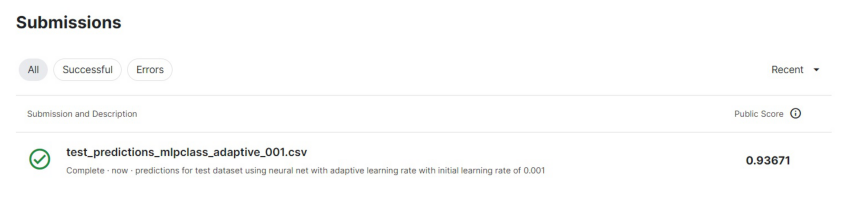

In [17]:
# Display the kaggle results associated with the MLP Classifier Model
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Kaggle_results_mlpclass_adaptive_001.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

#### Compile Results From Each of the Four Trials

In [18]:
# Save layer and node data
Learning_Rate = ('Constant', 'Constant', 'Adaptive', 'Adaptive')
Initial_Learning_Rate = (0.01, 0.001, 0.01, 0.001)
Time = ('3 minutes and 16 seconds', '8 minutes and 33 seconds', '6 minutes and 39 seconds', '8 minutes and 21 seconds')
Training_Accuracy = (0.9920, 0.9975, 0.9995, 0.9975)
Testing_Accuracy = (0.9405, 0.9367, 0.9440, 0.9367)

# create dataframe with MLP details and scores for each mode and layer count tested
MLP_Scores_SD = pd.DataFrame({'Learning Rate' : Learning_Rate,
                           'Initial Learning Rate' : Initial_Learning_Rate,
                           'Time' : Time,
                           'Training Accuracy': Training_Accuracy,
                           'Testing Accuracy': Testing_Accuracy})
MLP_Scores_SD

,Learning Rate,Initial Learning Rate,Time,Training Accuracy,Testing Accuracy
0,Constant,0.010,3 minutes and 16 seconds,0.9920,0.9405
1,Constant,0.001,8 minutes and 33 seconds,0.9975,0.9367
2,Adaptive,0.010,6 minutes and 39 seconds,0.9995,0.9440
3,Adaptive,0.001,8 minutes and 21 seconds,0.9975,0.9367


### MLP Classifier with Kernel PCA features

In [5]:
digit_training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Scale PCA dataframe's data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

sc = StandardScaler()
pca_scaled = sc.fit_transform(digit_training_data.drop(columns = ['label'])) # normalizing the features

# Convert scaled data from numpy array into dataframe
#pca_features = list(pca_df.columns.values)
pca_scaled_df = pd.DataFrame(pca_scaled)


# Applying PCA function on training and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components=334)
principal_components_digits = pca.fit_transform(pca_scaled_df)


# Create a Cumulative Scree plot to help us determine how many principal components to include in our random forest model
import matplotlib.pyplot as plt
import numpy as np

Training Accuracy: 0.9946666666666667
Training Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      0.99      0.99      4177
           3       0.99      0.99      0.99      4351
           4       1.00      0.99      0.99      4072
           5       0.99      1.00      0.99      3795
           6       1.00      1.00      1.00      4137
           7       1.00      0.99      1.00      4401
           8       0.99      1.00      0.99      4063
           9       0.99      1.00      0.99      4188

    accuracy                           0.99     42000
   macro avg       0.99      0.99      0.99     42000
weighted avg       0.99      0.99      0.99     42000

Training Accuracy: 0.9946666666666667
Training Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      1.00   

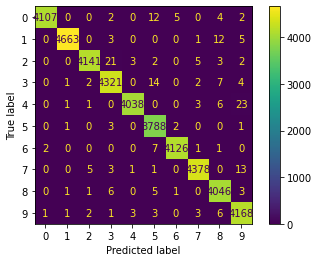

In [19]:
### PCA ###

from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #Initialize scaling of data
#nn_train_df.drop(['label'], axis=1, inplace=True) #drop the label column from the df

nn_train_x = principal_components_digits #set df without label as x
y_train = digit_training_data['label'] #set y a the label column
nn_train_df = pd.DataFrame(nn_train_x)
y_train = digit_training_data['label'] #set y a the label column

#sc.fit(nn_train_df)
#normalized = sc.transform(nn_train_df)

# Convert scaled data from numpy array into dataframe
nn_training_features = list(nn_train_df.columns)
nn_training_scaled_df = pd.DataFrame(nn_train_df, columns=nn_training_features)

# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize MLP Classifier
mlp_class = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20,20,20,20),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_class.fit(nn_train_df, y_train)
y_pred_train = mlp_class.predict(nn_train_df)

# evaluate the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)
print("Training Classification Report:", classification_report(y_train, y_pred_train))

print("Training Accuracy:", accuracy_train)
print("Training Classification Report:", classification_report(y_train, y_pred_train))

# Create the confusion matrix of the predictions
cm = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
### KERNEL ###

kernel_pca = KernelPCA(
    n_components=100, kernel="rbf")

kernel_data = kernel_pca.fit_transform(pca_scaled_df)

kernel_digits_df = pd.DataFrame(kernel_data)

#kernel_data.eigenvalues_

# Confirm scaling transformation was a success
#kernel_digits_df.shape
#kernel_digits_df.head(10)
#kernel_digits_df.describe()

#from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

# Initialize MLP Classifier
mlp_class = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_class.fit(kernel_df, y_train)
y_pred_train = mlp_class.predict(nn_train_df)

# evaluate the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)
print("Training Classification Report:", classification_report(y_train, y_pred_train))

print("Training Accuracy:", accuracy_train)
print("Training Classification Report:", classification_report(y_train, y_pred_train))

# Create the confusion matrix of the predictions
cm = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();